In [1]:
import pandas as pd
import numpy as np

givenchy = pd.DataFrame()

givenchy = pd.read_csv("/Users/lukedobrovic/Data/Finished Projects/alyx/givenchy.csv", index_col = 0)
givenchy.head()

,Item,Price,Date
0,Neckerchief/Bandana/Handkerchief,$60,about 12 hours ago
1,Givenchy Colombian Fit Abstract Girl Oversized...,$115,about 21 hours ago
2,Givenchy t shirt red,$210,1 day ago
3,Givenchy Pandora Bag black,$700,1 day ago
4,Rare Givenchy Black Crystal Ice Stud Earrings,$89,2 days ago


In [2]:
# Change sales with "hours ago" to "0 days ago"

counter = 0
for index, row in givenchy.iterrows():
    if "hours" in row["Date"]:
        givenchy.loc[counter, "Date"] = "0 days ago"
    counter +=1

givenchy.head()


,Item,Price,Date
0,Neckerchief/Bandana/Handkerchief,$60,0 days ago
1,Givenchy Colombian Fit Abstract Girl Oversized...,$115,0 days ago
2,Givenchy t shirt red,$210,1 day ago
3,Givenchy Pandora Bag black,$700,1 day ago
4,Rare Givenchy Black Crystal Ice Stud Earrings,$89,2 days ago


In [3]:
# Drop all sales outside of the month of data collection

months = ["about 1 month ago", 
          "about 2 months ago", 
          "2 months ago", 
          "3 months ago", 
          "4 months ago", 
          "5 months ago", 
          "6 months ago",
          "7 months ago", 
          "8 months ago", 
          "9 months ago", 
          "10 months ago", 
          "11 months ago", 
          "12 months ago", 
          "about 1 year ago"]

indices = givenchy.loc[givenchy['Date'].isin(months)].index
givenchy = givenchy.drop(indices, axis=0)

givenchy.tail()

,Item,Price,Date
282,Givenchy Paris Printed T-Shirt,$155,29 days ago
283,Vintage Givenchy Polo Shirt. Large Grey,$33,29 days ago
284,Embroidered Patch Stars with Paisley Print T S...,$130,29 days ago
285,Givenchy ankle boots 42,$250,29 days ago
286,FINAL DROP! Givenchy Polo Tee,$43,30 days ago


In [4]:
# Convert "Price" column datatype from other to int

givenchy['Price'] = givenchy['Price'].replace('[\$\,\.]', '', regex=True).astype(int)
givenchy.head()

,Item,Price,Date
0,Neckerchief/Bandana/Handkerchief,60,0 days ago
1,Givenchy Colombian Fit Abstract Girl Oversized...,115,0 days ago
2,Givenchy t shirt red,210,1 day ago
3,Givenchy Pandora Bag black,700,1 day ago
4,Rare Givenchy Black Crystal Ice Stud Earrings,89,2 days ago


In [5]:
givenchy["Price"].sum()

49435

In [16]:
# Create analytics DF with MSV, GSV, and TV by calculations on sales grouped by the day

analytics = pd.DataFrame()
analytics

MSV = round(givenchy.groupby(["Date"])["Price"].mean(), 2)
analytics["MSV"] = MSV

GSV = round(givenchy.groupby(["Date"])["Price"].sum(), 2)
analytics["GSV"] = GSV

TV = givenchy.groupby(["Date"])["Date"].count()
analytics["TV"] = TV

analytics["Days Ago"] = analytics.index
analytics.reset_index(inplace=True, drop=True)

analytics

,MSV,GSV,TV,Days Ago
0,87.50,175,2,0 days ago
1,455.00,910,2,1 day ago
2,155.75,1869,12,10 days ago
3,98.75,395,4,11 days ago
4,224.91,2474,11,12 days ago
5,218.29,3711,17,13 days ago
6,136.67,2050,15,14 days ago
7,148.38,1187,8,15 days ago
8,297.50,1785,6,16 days ago
9,157.54,2048,13,17 days ago


In [17]:
# Gather Days Ago as int, use to sort the DF

counter = 0
for row in analytics.iterrows():
    phrase = analytics.loc[counter, "Days Ago"]
#     print(phrase)
    num = int(phrase.split(" ")[0])
    analytics.loc[counter, "Days Ago"] = num
    counter +=1
    
sorted = analytics.sort_values(by = ["Days Ago"], ascending = False)

sorted

,MSV,GSV,TV,Days Ago
24,43.00,43,1,30
22,152.64,2137,14,29
21,211.94,3391,16,28
20,232.50,2325,10,27
19,158.42,1901,12,26
18,109.17,655,6,25
17,192.88,1543,8,24
16,165.80,2487,15,23
15,172.85,3457,20,22
14,153.14,1072,7,21


In [18]:
import datetime

string_date = "2020-06-30"
origin = datetime.datetime.strptime(string_date, "%Y-%m-%d")

counter = 0
for row in sorted.iterrows():
    days_ago = int(sorted.loc[counter, "Days Ago"])
    delta = datetime.timedelta(days = days_ago)
    sorted.loc[counter, "Date"] = origin - delta
    counter +=1
    
sorted.reset_index(inplace=True, drop=True)
sorted.drop(sorted.head(1).index,inplace=True)

sorted

,MSV,GSV,TV,Days Ago,Date
1,152.64,2137,14,29,2020-06-01
2,211.94,3391,16,28,2020-06-02
3,232.50,2325,10,27,2020-06-03
4,158.42,1901,12,26,2020-06-04
5,109.17,655,6,25,2020-06-05
6,192.88,1543,8,24,2020-06-06
7,165.80,2487,15,23,2020-06-07
8,172.85,3457,20,22,2020-06-08
9,153.14,1072,7,21,2020-06-09
10,170.80,1708,10,20,2020-06-10


In [20]:
sorted.to_csv("sorted_givenchy")

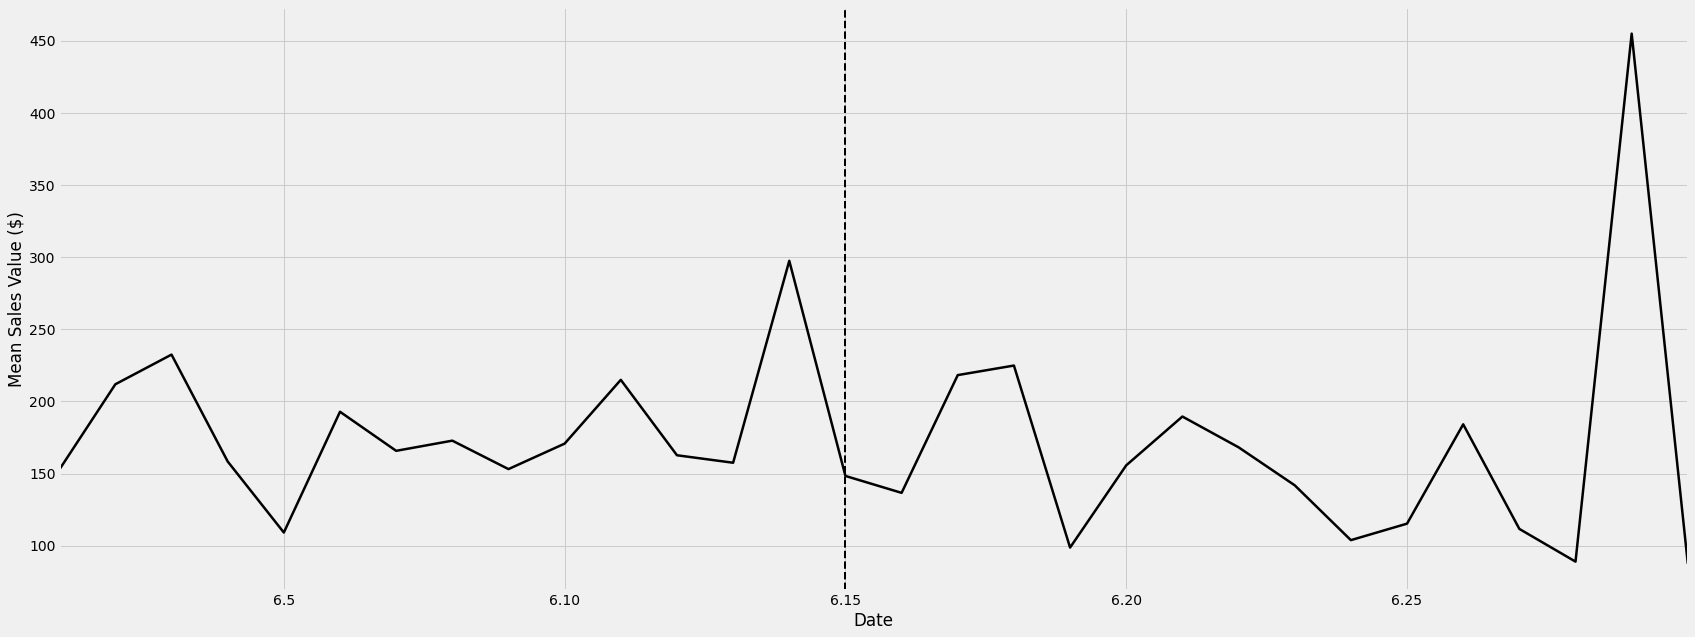

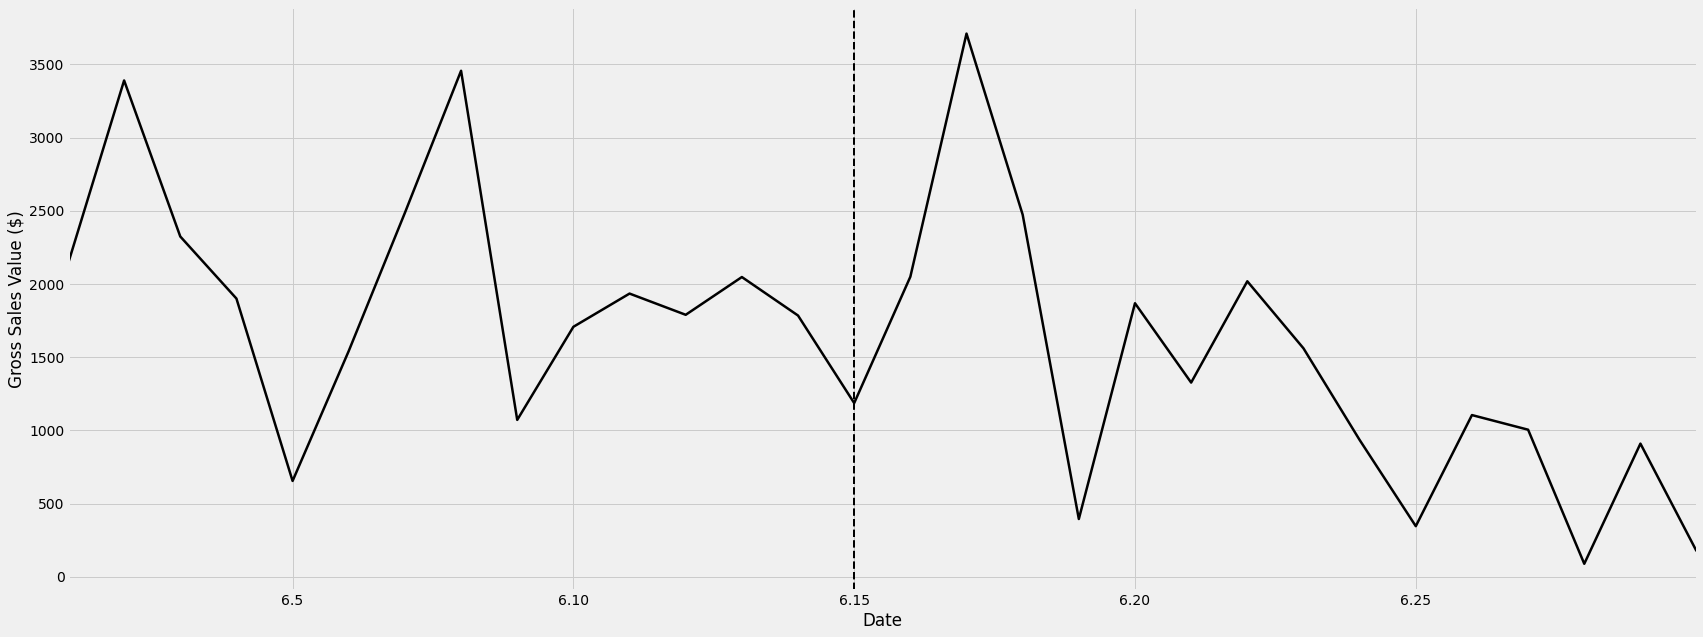

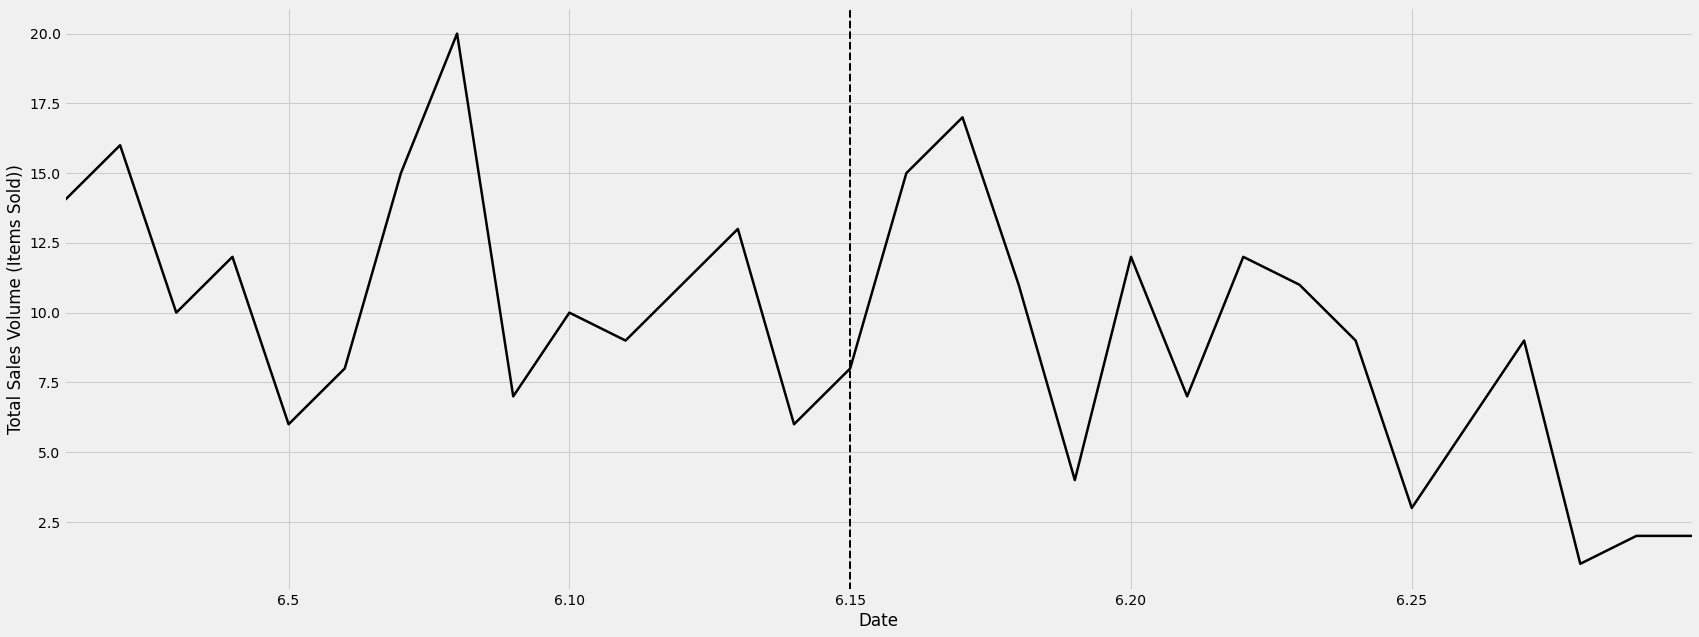

In [22]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")


one = "2020-06-05"
ones = datetime.datetime.strptime(one, "%Y-%m-%d")

two = "2020-06-10"
twos = datetime.datetime.strptime(two, "%Y-%m-%d")

three = "2020-06-15"
threes = datetime.datetime.strptime(three, "%Y-%m-%d")

four = "2020-06-20"
fours = datetime.datetime.strptime(four, "%Y-%m-%d")

five = "2020-06-25"
fives = datetime.datetime.strptime(five, "%Y-%m-%d")


MSV_plot = sorted.plot(x = "Date", 
                       y = "MSV", 
                       legend=None, 
                       figsize = (26, 10), 
                       color = "black",
                       linewidth = 2.5)
MSV_plot.set_ylabel("Mean Sales Value ($)")
MSV_plot.set_xlabel("Date")

MSV_plot.tick_params(axis = "x", which = "minor", bottom = False, top = False, labelbottom = False)
MSV_plot.set_xticks(ticks = [ones, twos, threes, fours, fives])
MSV_plot.set_xticklabels(labels = ["6.5", "6.10", "6.15", "6.20", "6.25"])
MSV_plot.axvline(x=three, linestyle = "dashed", color = "black", linewidth = 2)

GSV_plot = sorted.plot(x = "Date", 
                       y = "GSV", 
                       legend=None,
                      figsize = (26, 10),
                      color = "black", 
                      linewidth = 2.5)
GSV_plot.set_ylabel("Gross Sales Value ($)")
GSV_plot.set_xlabel("Date")

GSV_plot.tick_params(axis = "x", which = "minor", bottom = False, top = False, labelbottom = False)
GSV_plot.set_xticks(ticks = [ones, twos, threes, fours, fives])
GSV_plot.axvline(x=three, linestyle = "dashed", color = "black", linewidth = 2)
GSV_plot.set_xticklabels(labels = ["6.5", "6.10", "6.15", "6.20", "6.25"])

TV_plot = sorted.plot(x = "Date", 
                      y = "TV", 
                      legend=None,
                     figsize = (26, 10),
                     color = "black",
                     linewidth = 2.5)
TV_plot.set_ylabel("Total Sales Volume (Items Sold))")
TV_plot.set_xlabel("Date")

TV_plot.tick_params(axis = "x", which = "minor", bottom = False, top = False, labelbottom = False)
TV_plot.set_xticks(ticks = [ones, twos, threes, fours, fives])
TV_plot.set_xticklabels(labels = ["6.5", "6.10", "6.15", "6.20", "6.25"])
TV_plot.axvline(x=three, linestyle = "dashed", color = "black", linewidth = 2)